
# Árbol de Decisión (Clasificación) con dataset más grande: **Breast Cancer Wisconsin**

Este cuaderno usa el dataset **Breast Cancer Wisconsin** de `scikit-learn` (569 filas, 30 variables) para entrenar y evaluar un **DecisionTreeClassifier**.

Incluye:
- Carga y exploración rápida de datos
- División **train/test** estratificada
- Entrenamiento del árbol con **Gini** (y opción Entropy)
- Métricas: **accuracy**, **precision/recall/F1**, **matriz de confusión**
- **Curva ROC-AUC**
- Visualización del **árbol** y **importancia de variables**
- **GridSearchCV** (tuning de hiperparámetros)
- Curva de **validación** por `max_depth`


In [ ]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_fscore_support
)

np.random.seed(42)
# Ese np.random.seed(42) se usa para fijar la semilla aleatoria y así garantizar que los resultados sean reproducibles.

In [ ]:
# Carga de datos
ds = load_breast_cancer()

X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = pd.Series(ds.target, name="target")  # 0 = malignant, 1 = benign
target_names = ds.target_names

print("Dimensiones:", X.shape)
X.head()


Dimensiones: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


                 count        mean         std        min        25%  \
mean radius      569.0   14.127292    3.524049    6.98100   11.70000   
mean texture     569.0   19.289649    4.301036    9.71000   16.17000   
mean perimeter   569.0   91.969033   24.298981   43.79000   75.17000   
mean area        569.0  654.889104  351.914129  143.50000  420.30000   
mean smoothness  569.0    0.096360    0.014064    0.05263    0.08637   

                       50%       75%        max  
mean radius       13.37000   15.7800    28.1100  
mean texture      18.84000   21.8000    39.2800  
mean perimeter    86.24000  104.1000   188.5000  
mean area        551.10000  782.7000  2501.0000  
mean smoothness    0.09587    0.1053     0.1634  

Distribución de clases (0=malignant, 1=benign):
 target
0    212
1    357
Name: count, dtype: int64


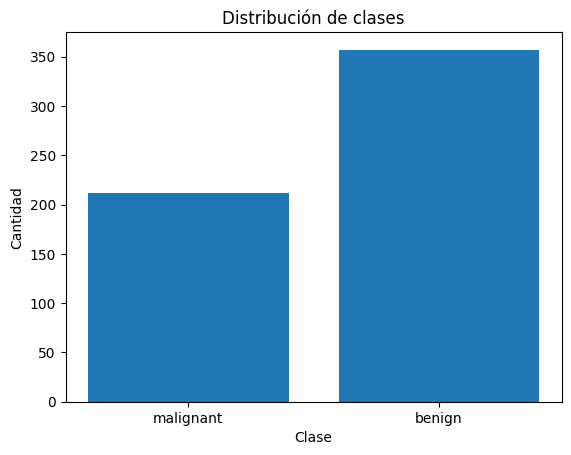

In [ ]:
# Resumen básico y balance de clases
print(X.describe().T.head())
class_counts = y.value_counts().sort_index()
print("\nDistribución de clases (0=malignant, 1=benign):\n", class_counts)

plt.figure()
plt.bar(range(len(class_counts)), class_counts.values)
plt.xticks(range(len(class_counts)), target_names, rotation=0)
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()


In [ ]:
# Separación de Train/Test split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_train.shape, X_test.shape


((426, 30), (143, 30))

In [ ]:
# Entrenamiento Árbol (Gini)
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy test (gini): {acc:.3f}")
print("\nReporte de clasificación (gini):\n", classification_report(y_test, y_pred, target_names=target_names))




Accuracy test (gini): 0.923

Reporte de clasificación (gini):
               precision    recall  f1-score   support

   malignant       0.88      0.92      0.90        53
      benign       0.95      0.92      0.94        90

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



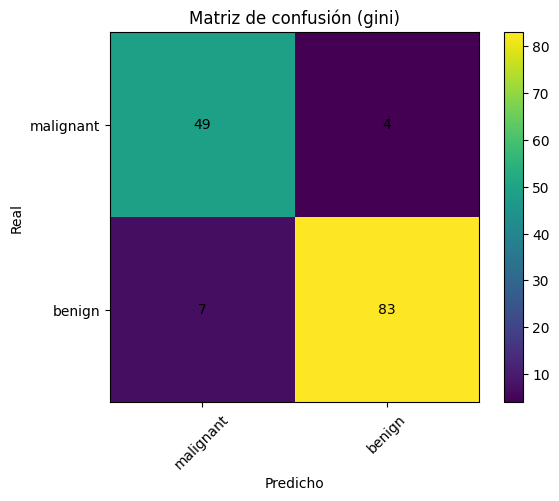

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de confusión (gini)")
plt.xticks(range(len(target_names)), target_names, rotation=45)
plt.yticks(range(len(target_names)), target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.colorbar()
plt.show()

AUC (gini): 0.923


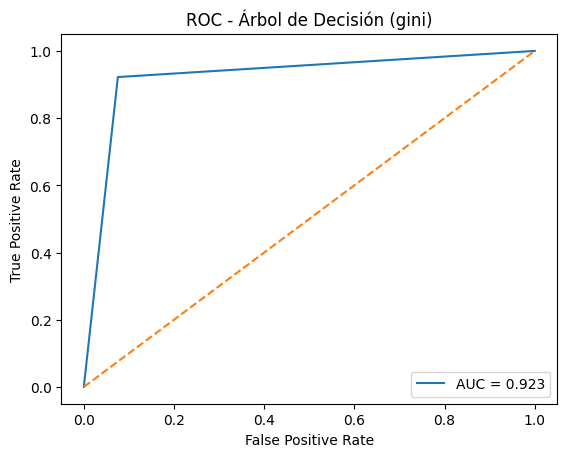

In [ ]:
# [roc] Curva ROC-AUC
# Para ROC necesitamos probabilidades o decision_function
if hasattr(clf, "predict_proba"):
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    print(f"AUC (gini): {roc_auc:.3f}")
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC - Árbol de Decisión (gini)")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("El clasificador no soporta predict_proba para ROC.")


¿Por qué es útil en árboles de decisión?

El accuracy puede ser engañoso si hay clases desbalanceadas.

La ROC-AUC mide el poder de discriminación del modelo en todos los umbrales posibles, no solo en el 0.5.

Es estándar en problemas médicos, de riesgo, y detección de fraude.

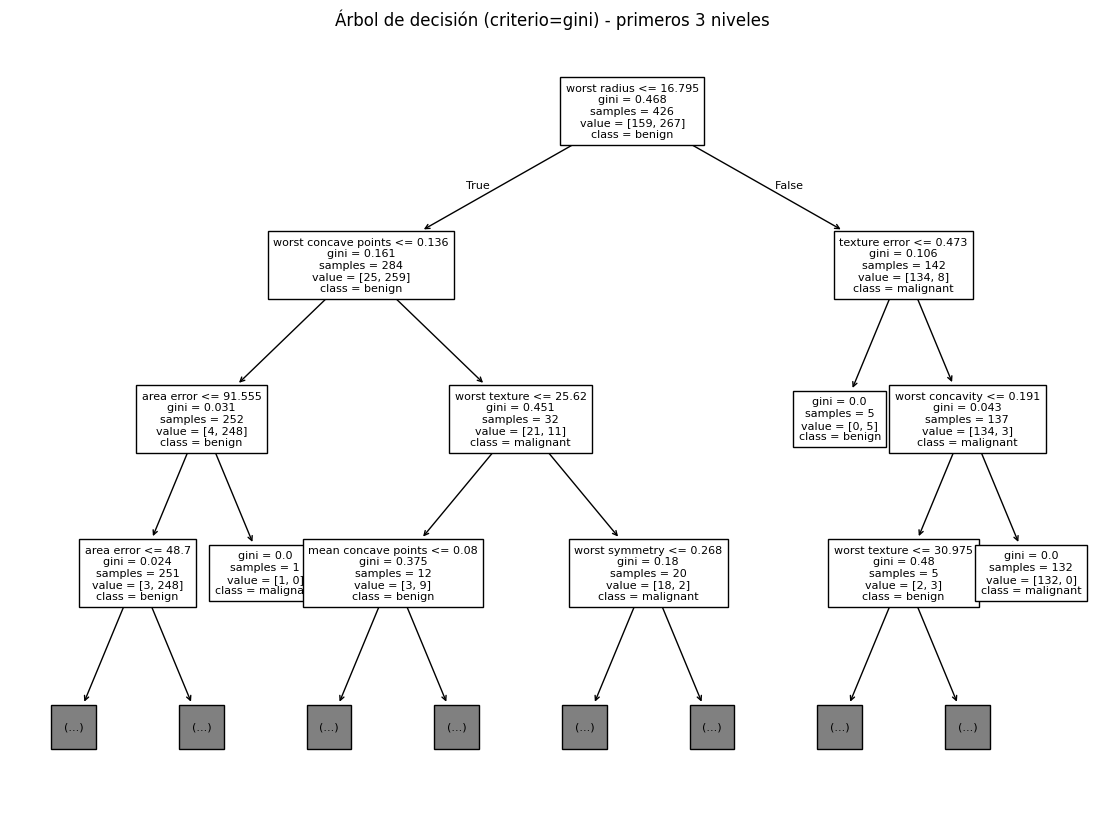

In [ ]:

# %% [viz-tree] Visualización del árbol (primeros niveles)
plt.figure(figsize=(14, 10))
plot_tree(clf, feature_names=X.columns, class_names=target_names, filled=False, max_depth=3, fontsize=8)
plt.title("Árbol de decisión (criterio=gini) - primeros 3 niveles")
plt.show()


worst radius            0.695463
worst concave points    0.116844
worst texture           0.061358
texture error           0.046310
worst concavity         0.017403
mean concave points     0.013547
area error              0.012069
worst symmetry          0.011373
worst area              0.009031
mean radius             0.007526
dtype: float64


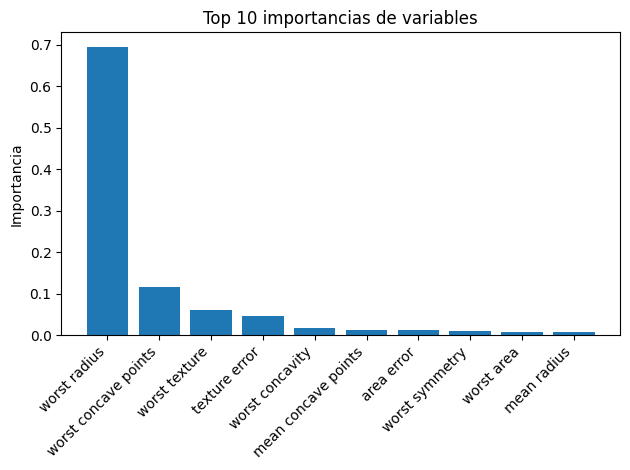

In [ ]:

# %% [importances] Importancias de variables
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

plt.figure()
plt.bar(importances.index[:10], importances.values[:10])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 importancias de variables")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()
